In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [2]:
file_path = 'diabetic_data.csv' 
diabetes = pd.read_csv(file_path)

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Accuracy: 0.54
Confusion Matrix:
[[    0   178  2107]
 [    0   569  6548]
 [    0   543 10409]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2285
         1.0       0.44      0.08      0.14      7117
         2.0       0.55      0.95      0.69     10952

    accuracy                           0.54     20354
   macro avg       0.33      0.34      0.28     20354
weighted avg       0.45      0.54      0.42     20354



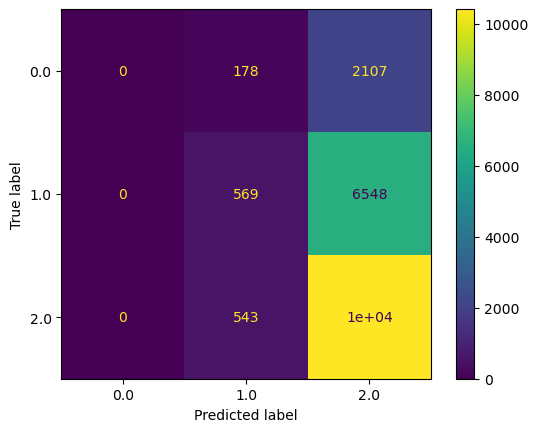

In [12]:
# presence of 428 - Congestive heart failure, unspecified
# WE DECIDED NOT TO USE THIS MODEL

diabetes["diag_1_428"] = diabetes["diag_1"] == "428"
diabetes["diag_2_428"] = diabetes["diag_2"] == "428"
diabetes["diag_3_428"] = diabetes["diag_3"] == "428"

features = ["diag_1_428", "diag_2_428", "diag_3_428"]


data = diabetes[features].values
# just added the ordinal encoder so it might not work? But it's categorical so we should encode
target = OrdinalEncoder(categories=[["<30", ">30", "NO"]]).fit_transform(diabetes[["readmitted"]].values)


data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(10, 20)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.15
Confusion Matrix:
[[2514    2  122   72  122    0    0    0    0    0    0    0    0    0]
 [2889    4  215  123  174    0    0    0    0    0    0    0    0    0]
 [3012    3  222  141  209    0    0    0    0    0    0    0    0    0]
 [2323    2  194  152  166    0    0    0    0    0    0    0    0    0]
 [1641    3  137  108  151    0    0    0    0    0    0    0    0    0]
 [1158    2  128   88  130    0    0    0    0    0    0    0    0    0]
 [ 917    3   79   71   85    0    0    0    0    0    0    0    0    0]
 [ 701    0   49   64   72    0    0    0    0    0    0    0    0    0]
 [ 444    1   45   41   46    0    0    0    0    0    0    0    0    0]
 [ 354    1   35   31   31    0    0    0    0    0    0    0    0    0]
 [ 310    0   22   23   24    0    0    0    0    0    0    0    0    0]
 [ 238    0   16   19   18    0    0    0    0    0    0    0    0    0]
 [ 177    0   13    5   11    0    0    0    0    0    0    0    0    0]
 [ 162    0   13  

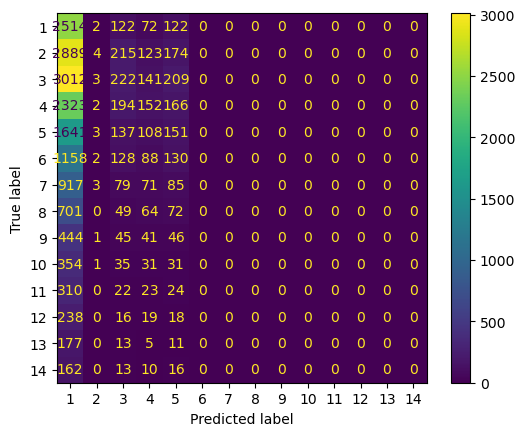

In [4]:
# presence of 428 - Congestive heart failure, unspecified

diabetes["diag_1_428"] = diabetes["diag_1"] == "428"
diabetes["diag_2_428"] = diabetes["diag_2"] == "428"
diabetes["diag_3_428"] = diabetes["diag_3"] == "428"

features = ["diag_1_428", "diag_2_428", "diag_3_428"]


data = diabetes[features].values

target = diabetes["time_in_hospital"].values

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(2, 21)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Accuracy: 0.53
Confusion Matrix:
[[    0    43  2242]
 [    0   171  6946]
 [    0   276 10676]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2285
         1.0       0.35      0.02      0.04      7117
         2.0       0.54      0.97      0.69     10952

    accuracy                           0.53     20354
   macro avg       0.30      0.33      0.25     20354
weighted avg       0.41      0.53      0.39     20354



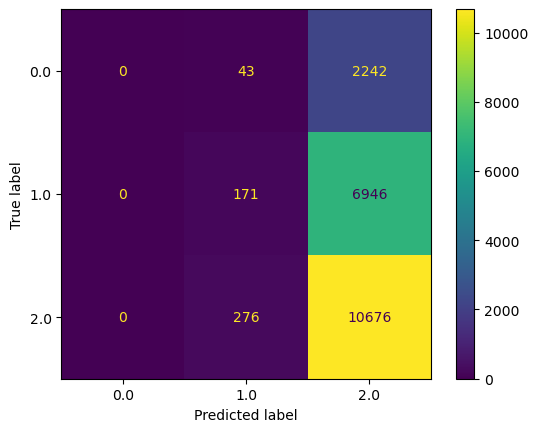

In [13]:
# presence of 414 - Coronary atherosclerosis of unspecified type of vessel, native or graft

diabetes["diag_1_414"] = diabetes["diag_1"] == "414"
diabetes["diag_2_414"] = diabetes["diag_2"] == "414"
diabetes["diag_3_414"] = diabetes["diag_3"] == "414"

features = ["diag_1_414", "diag_2_414", "diag_3_414"]


data = diabetes[features].values
# just added the ordinal encoder so it might not work? But it's categorical so we should encode
target = OrdinalEncoder(categories=[["<30", ">30", "NO"]]).fit_transform(diabetes[["readmitted"]].values)


data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(10, 20)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.14
Confusion Matrix:
[[2593  133  106    0    0    0    0    0    0    0    0    0    0    0]
 [3138  145  122    0    0    0    0    0    0    0    0    0    0    0]
 [3368  129   90    0    0    0    0    0    0    0    0    0    0    0]
 [2667  108   62    0    0    0    0    0    0    0    0    0    0    0]
 [1946   66   28    0    0    0    0    0    0    0    0    0    0    0]
 [1442   46   18    0    0    0    0    0    0    0    0    0    0    0]
 [1120   21   14    0    0    0    0    0    0    0    0    0    0    0]
 [ 851   25   10    0    0    0    0    0    0    0    0    0    0    0]
 [ 557   14    6    0    0    0    0    0    0    0    0    0    0    0]
 [ 435   12    5    0    0    0    0    0    0    0    0    0    0    0]
 [ 367   10    2    0    0    0    0    0    0    0    0    0    0    0]
 [ 284    6    1    0    0    0    0    0    0    0    0    0    0    0]
 [ 203    2    1    0    0    0    0    0    0    0    0    0    0    0]
 [ 197    3    1  

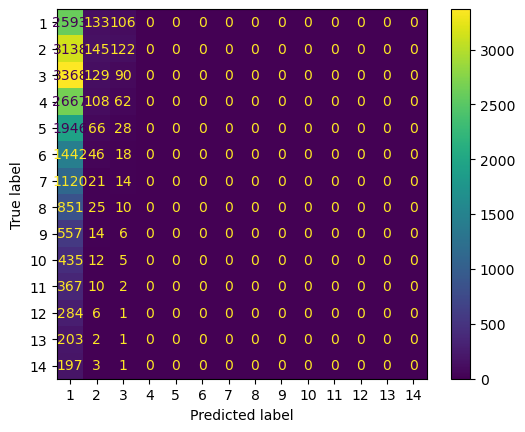

In [5]:
# presence of 414 - Coronary atherosclerosis of unspecified type of vessel, native or graft

diabetes["diag_1_414"] = diabetes["diag_1"] == "414"
diabetes["diag_2_414"] = diabetes["diag_2"] == "414"
diabetes["diag_3_414"] = diabetes["diag_3"] == "414"

features = ["diag_1_414", "diag_2_414", "diag_3_414"]


data = diabetes[features].values

target = diabetes["time_in_hospital"].values


data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(10, 20)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Accuracy: 0.54
Confusion Matrix:
[[    0     6  2279]
 [    0    19  7098]
 [    0    34 10918]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2285
         1.0       0.32      0.00      0.01      7117
         2.0       0.54      1.00      0.70     10952

    accuracy                           0.54     20354
   macro avg       0.29      0.33      0.23     20354
weighted avg       0.40      0.54      0.38     20354



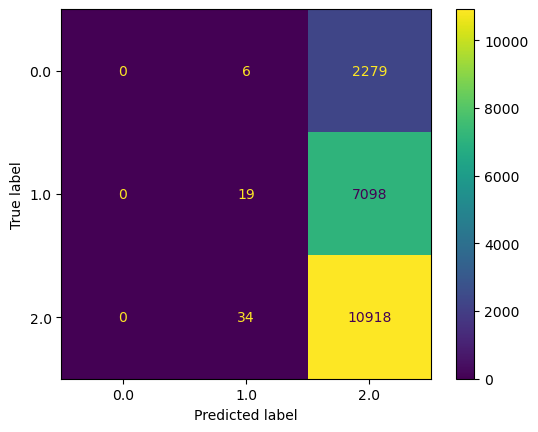

In [14]:
# presence of 427 - Paroxysmal supraventricular tachycardia

diabetes["diag_1_427"] = diabetes["diag_1"] == "427"
diabetes["diag_2_427"] = diabetes["diag_2"] == "427"
diabetes["diag_3_427"] = diabetes["diag_3"] == "427"

features = ["diag_1_427", "diag_2_427", "diag_3_427"]


data = diabetes[features].values
# just added the ordinal encoder so it might not work? But it's categorical so we should encode
target = OrdinalEncoder(categories=[["<30", ">30", "NO"]]).fit_transform(diabetes[["readmitted"]].values)


data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(10, 20)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.14
Confusion Matrix:
[[  74   97  115 2533   13    0    0    0    0    0    0    0    0    0]
 [  76  104  152 3064    9    0    0    0    0    0    0    0    0    0]
 [ 126   98  161 3191   11    0    0    0    0    0    0    0    0    0]
 [ 108   64  142 2514    9    0    0    0    0    0    0    0    0    0]
 [  71   51  109 1799   10    0    0    0    0    0    0    0    0    0]
 [  73   30   62 1337    4    0    0    0    0    0    0    0    0    0]
 [  46   20   60 1028    1    0    0    0    0    0    0    0    0    0]
 [  39   13   41  792    1    0    0    0    0    0    0    0    0    0]
 [  27   13   24  512    1    0    0    0    0    0    0    0    0    0]
 [  20    8   20  404    0    0    0    0    0    0    0    0    0    0]
 [  14    5   11  349    0    0    0    0    0    0    0    0    0    0]
 [  15    5   14  257    0    0    0    0    0    0    0    0    0    0]
 [   9    5    7  184    1    0    0    0    0    0    0    0    0    0]
 [  13    3   11  

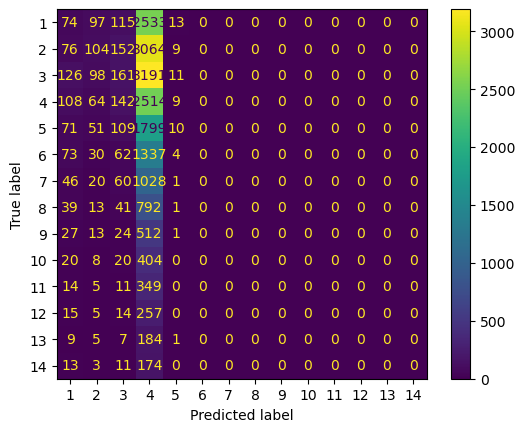

In [6]:
# presence of 427 - Paroxysmal supraventricular tachycardia

diabetes["diag_1_427"] = diabetes["diag_1"] == "427"
diabetes["diag_2_427"] = diabetes["diag_2"] == "427"
diabetes["diag_3_427"] = diabetes["diag_3"] == "427"

features = ["diag_1_427", "diag_2_427", "diag_3_427"]


data = diabetes[features].values

target = diabetes["time_in_hospital"].values

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(10, 20)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Accuracy: 0.54
Confusion Matrix:
[[    0     0  2285]
 [    0     0  7117]
 [    0     0 10952]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2285
         1.0       0.00      0.00      0.00      7117
         2.0       0.54      1.00      0.70     10952

    accuracy                           0.54     20354
   macro avg       0.18      0.33      0.23     20354
weighted avg       0.29      0.54      0.38     20354



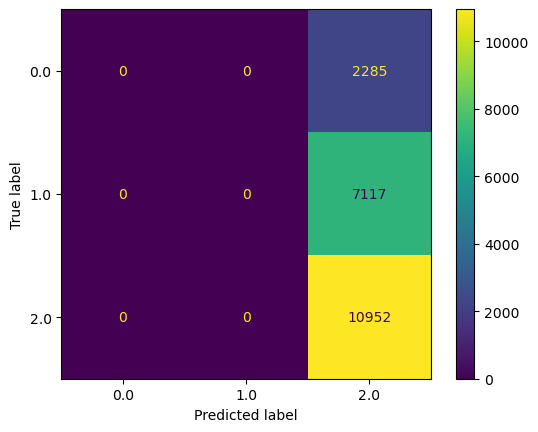

In [15]:
# presence of 250  - Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled

diabetes["diag_1_250"] = diabetes["diag_1"] == "250"
diabetes["diag_2_250"] = diabetes["diag_2"] == "250"
diabetes["diag_3_250"] = diabetes["diag_3"] == "250"

features = ["diag_1_250", "diag_2_250", "diag_3_250"]


data = diabetes[features].values
# just added the ordinal encoder so it might not work? But it's categorical so we should encode
target = OrdinalEncoder(categories=[["<30", ">30", "NO"]]).fit_transform(diabetes[["readmitted"]].values)


data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(10, 20)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Maia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.16
Confusion Matrix:
[[ 860    0    0 1972    0    0    0    0    0    0    0    0    0    0]
 [ 730    0    0 2675    0    0    0    0    0    0    0    0    0    0]
 [ 725    0    0 2862    0    0    0    0    0    0    0    0    0    0]
 [ 440    0    0 2397    0    0    0    0    0    0    0    0    0    0]
 [ 274    0    0 1766    0    0    0    0    0    0    0    0    0    0]
 [ 166    0    0 1340    0    0    0    0    0    0    0    0    0    0]
 [ 127    0    0 1028    0    0    0    0    0    0    0    0    0    0]
 [  89    0    0  797    0    0    0    0    0    0    0    0    0    0]
 [  46    0    0  531    0    0    0    0    0    0    0    0    0    0]
 [  38    0    0  414    0    0    0    0    0    0    0    0    0    0]
 [  29    0    0  350    0    0    0    0    0    0    0    0    0    0]
 [  12    0    0  279    0    0    0    0    0    0    0    0    0    0]
 [  11    0    0  195    0    0    0    0    0    0    0    0    0    0]
 [  11    0    0  

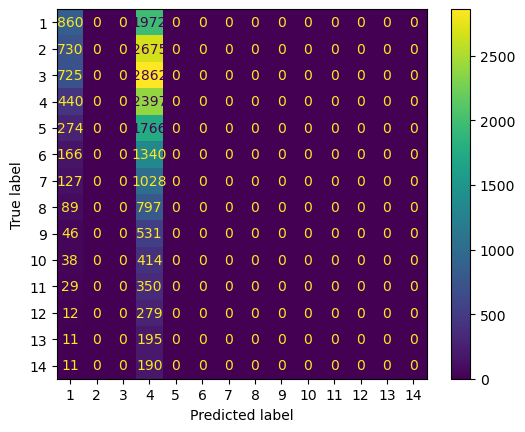

In [7]:
# presence of 250  - Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled

diabetes["diag_1_250"] = diabetes["diag_1"] == "250"
diabetes["diag_2_250"] = diabetes["diag_2"] == "250"
diabetes["diag_3_250"] = diabetes["diag_3"] == "250"

features = ["diag_1_250", "diag_2_250", "diag_3_250"]


data = diabetes[features].values

target = diabetes["time_in_hospital"].values

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

possible_parameters = {"n_neighbors" : range(10, 20)}

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = possible_parameters)
model.fit(data_train, target_train)

y_pred = model.predict(data_test)

accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
classification_rep = classification_report(target_test, y_pred)

ConfusionMatrixDisplay.from_estimator(estimator = model, X = data_test, y = target_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')